In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
from sklearn.model_selection import KFold # import KFold
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [3]:
df1 = pd.read_excel('Accident prediction/Datasets/RTA Dataset.xlsx')
df2 = pd.read_excel('Accident prediction/Datasets/RTADatasetE1.xlsx')

In [5]:
df1.columns.difference(df2.columns)

Index(['Number_of_casualties', 'Number_of_vehicles_involved'], dtype='object')

In [7]:
new_df = pd.concat([df1,df2],axis =0)

In [9]:
new_df.shape

(15205, 32)

In [11]:
df_copy = new_df.copy()

#### Data Preprocessing


In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15205 entries, 0 to 2888
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         15205 non-null  object 
 1   Day_of_week                  15205 non-null  object 
 2   Age_band_of_driver           15205 non-null  object 
 3   Sex_of_driver                15205 non-null  object 
 4   Educational_level            14464 non-null  object 
 5   Vehicle_driver_relation      14626 non-null  object 
 6   Driving_experience           14376 non-null  object 
 7   Type_of_vehicle              14255 non-null  object 
 8   Owner_of_vehicle             14723 non-null  object 
 9   Service_year_of_vehicle      11277 non-null  object 
 10  Defect_of_vehicle            10778 non-null  object 
 11  Area_accident_occured        14966 non-null  object 
 12  Lanes_or_Medians             14820 non-null  object 
 13  Road_allignment       

In [15]:
new_df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [17]:
new_df.describe(include=['O'])

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,15205,15205,15205,15205,14464,14626,14376,14255,14723,11277,...,14897,15205,15205,14163,15205,12007,12570,15205,15205,15205
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,4,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,145,2517,5671,14168,9560,12049,4249,4003,13032,2883,...,10091,7134,6470,4443,9800,7758,12482,14058,2822,12881


In [19]:
new_df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved    2889
Number_of_casualties           2889
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty           1042
Casualty_severity                 0
Work_of_casuality           

In [21]:
new_df['Day_of_week'].value_counts()
# Most Accidents occured at friday

Day_of_week
Friday       2517
Thursday     2294
Wednesday    2239
Tuesday      2184
Saturday     2105
Monday       2066
Sunday       1800
Name: count, dtype: int64

In [23]:
new_df.duplicated().sum()

0

In [25]:
new_df['Cause_of_accident'].value_counts()

Cause_of_accident
No distancing                           2822
Changing lane to the right              2232
Changing lane to the left               1783
Driving carelessly                      1739
No priority to vehicle                  1484
Moving Backward                         1405
No priority to pedestrian                881
Other                                    554
Overtaking                               527
Driving under the influence of drugs     429
Driving to the left                      351
Getting off the vehicle improperly       241
Driving at high speed                    217
Overturning                              192
Turnover                                 106
Overspeed                                 81
Overloading                               72
Drunk driving                             32
Unknown                                   29
Improper parking                          28
Name: count, dtype: int64

In [27]:
new_df.groupby('Accident_severity').size()

Accident_severity
Fatal injury        189
Serious Injury     2135
Slight Injury     12881
dtype: int64

### Filling Missing values

In [30]:
new_df['Educational_level'].fillna(new_df['Educational_level'].mode()[0],inplace=True)
new_df['Vehicle_driver_relation'].fillna(new_df['Vehicle_driver_relation'].mode()[0],inplace=True)
new_df['Driving_experience'].fillna(new_df['Driving_experience'].mode()[0],inplace=True)
new_df['Type_of_vehicle'].fillna(new_df['Vehicle_driver_relation'].mode()[0],inplace=True)
new_df['Owner_of_vehicle'].fillna(new_df['Owner_of_vehicle'].mode()[0],inplace=True)
new_df['Service_year_of_vehicle'].fillna(new_df['Service_year_of_vehicle'].mode()[0],inplace=True)
new_df['Defect_of_vehicle'].fillna(new_df['Defect_of_vehicle'].mode()[0],inplace=True)
new_df['Area_accident_occured'].fillna(new_df['Area_accident_occured'].mode()[0],inplace=True)
new_df['Lanes_or_Medians'].fillna(new_df['Lanes_or_Medians'].mode()[0],inplace=True)
new_df['Road_allignment'].fillna(new_df['Road_allignment'].mode()[0],inplace=True)
new_df['Types_of_Junction'].fillna(new_df['Types_of_Junction'].mode()[0],inplace=True)
new_df['Road_surface_type'].fillna(new_df['Road_surface_type'].mode()[0],inplace=True)
new_df['Type_of_collision'].fillna(new_df['Type_of_collision'].mode()[0],inplace=True)
new_df['Number_of_vehicles_involved'].fillna(new_df['Number_of_vehicles_involved'].mode()[0],inplace=True)
new_df['Number_of_casualties'].fillna(new_df['Number_of_casualties'].mode()[0],inplace=True)
new_df['Vehicle_movement'].fillna(new_df['Vehicle_movement'].mode()[0],inplace=True)
new_df['Age_band_of_casualty'].fillna(new_df['Age_band_of_casualty'].mode()[0],inplace=True)
new_df['Work_of_casuality'].fillna(new_df['Work_of_casuality'].mode()[0],inplace=True)
new_df['Fitness_of_casuality'].fillna(new_df['Fitness_of_casuality'].mode()[0],inplace=True)

In [32]:
new_df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [34]:
new_df.columns = new_df.columns.str.strip()
new_df.columns = new_df.columns.str.lower()

In [36]:
new_df.columns

Index(['time', 'day_of_week', 'age_band_of_driver', 'sex_of_driver',
       'educational_level', 'vehicle_driver_relation', 'driving_experience',
       'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle',
       'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians',
       'road_allignment', 'types_of_junction', 'road_surface_type',
       'road_surface_conditions', 'light_conditions', 'weather_conditions',
       'type_of_collision', 'number_of_vehicles_involved',
       'number_of_casualties', 'vehicle_movement', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement',
       'cause_of_accident', 'accident_severity'],
      dtype='object')

In [38]:
new_df['number_of_casualties'].mean()

1.4439986846432096

In [40]:
new_df.head()

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,...,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Employee,Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [42]:
new_df['area_accident_occured'].value_counts()

area_accident_occured
Other                              5023
Office areas                       4114
Residential areas                  2584
 Church areas                      1373
 Industrial areas                   572
School areas                        519
  Recreational areas                327
 Outside rural areas                288
 Hospital areas                     152
  Market areas                       84
Rural village areas                  68
  RecreatioNAl areas                 53
Rural village areasOffice areas      25
Unknown                              22
Recreational areas                    1
Name: count, dtype: int64

#### Exploratory Data Analysis (EDA)

In [45]:
new_df.columns

Index(['time', 'day_of_week', 'age_band_of_driver', 'sex_of_driver',
       'educational_level', 'vehicle_driver_relation', 'driving_experience',
       'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle',
       'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians',
       'road_allignment', 'types_of_junction', 'road_surface_type',
       'road_surface_conditions', 'light_conditions', 'weather_conditions',
       'type_of_collision', 'number_of_vehicles_involved',
       'number_of_casualties', 'vehicle_movement', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement',
       'cause_of_accident', 'accident_severity'],
      dtype='object')

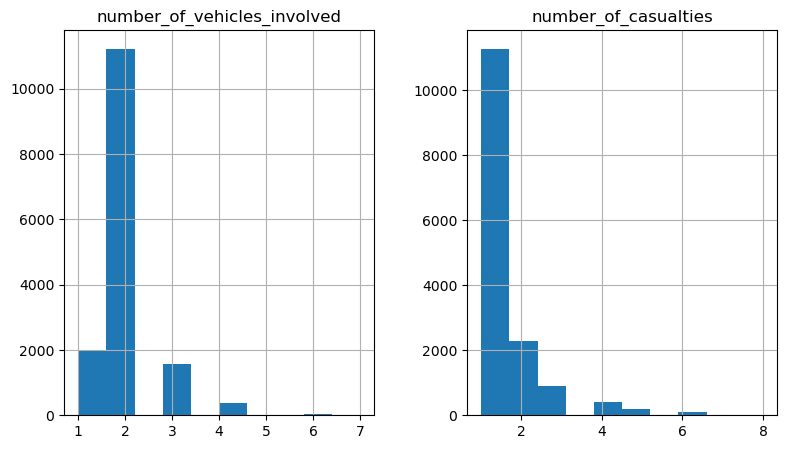

In [47]:
new_df.hist(layout=(1,6), figsize=(30,5))
plt.show()

<Axes: xlabel='age_band_of_driver', ylabel='Count'>

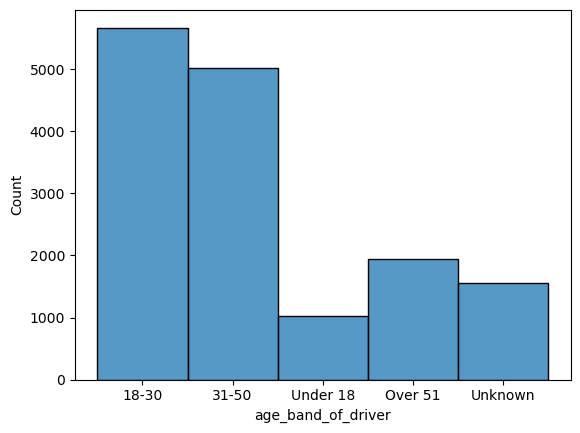

In [49]:
sns.histplot(new_df['age_band_of_driver'])

<Axes: >

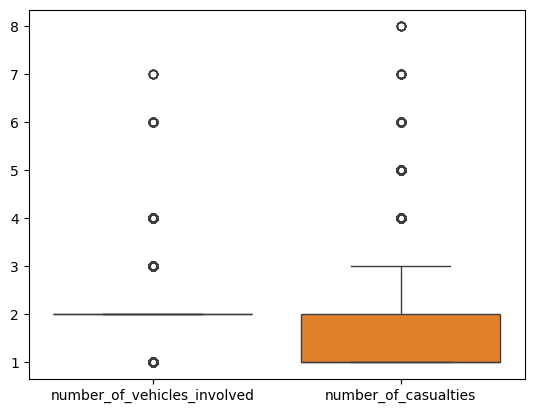

In [51]:
sns.boxplot(new_df)

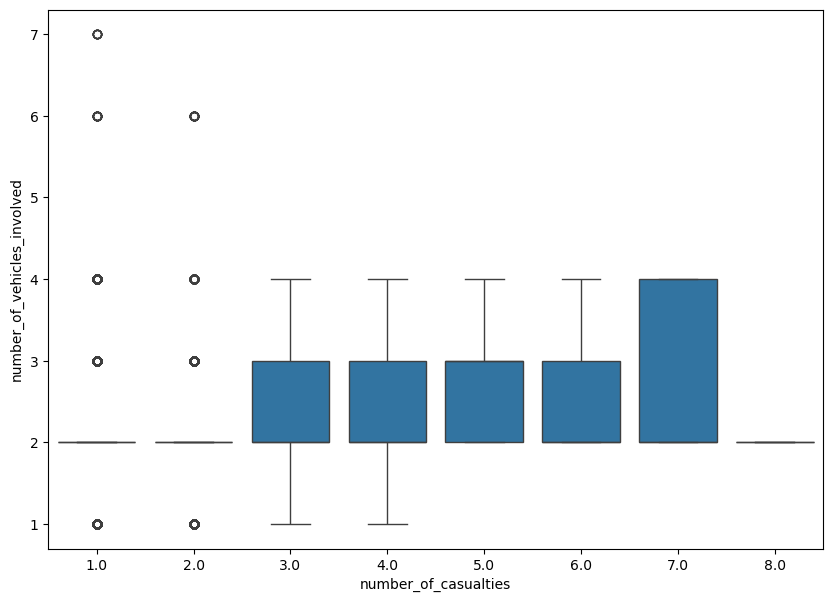

In [53]:
plt.figure(figsize=(10,7))
sns.boxplot(data=new_df, y='number_of_vehicles_involved', x='number_of_casualties')
plt.show()

<Axes: xlabel='number_of_casualties', ylabel='Count'>

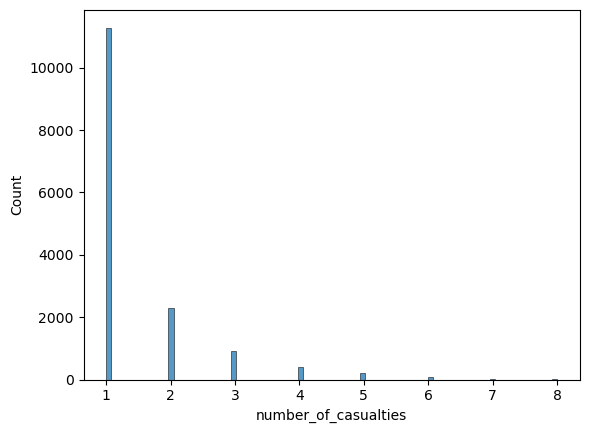

In [55]:
sns.histplot(new_df['number_of_casualties'])

<Axes: xlabel='road_surface_conditions', ylabel='count'>

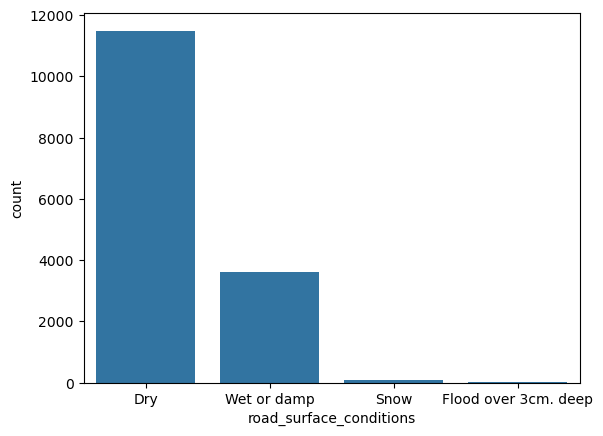

In [57]:
sns.barplot(new_df['road_surface_conditions'].value_counts())

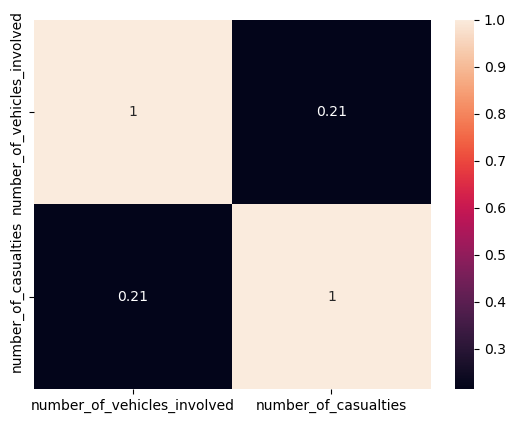

In [59]:
correlation_matrix = new_df[['number_of_vehicles_involved','number_of_casualties']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [61]:
new_df['type_of_collision'].value_counts()

type_of_collision
Vehicle with vehicle collision             11070
Collision with roadside objects             2160
Collision with pedestrians                  1137
Rollover                                     476
Collision with animals                       204
Collision with roadside-parked vehicles       63
Fall from vehicles                            41
Other                                         30
Unknown                                       14
With Train                                    10
Name: count, dtype: int64

In [63]:
'''for col in new_df.drop('Accident_severity', axis=1):
    g = sns.FacetGrid(new_df, col='Accident_severity', aspect=1, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()'''

"for col in new_df.drop('Accident_severity', axis=1):\n    g = sns.FacetGrid(new_df, col='Accident_severity', aspect=1, sharey=False)\n    g.map(sns.countplot, col, palette = 'Dark2')\n    plt.show()"

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

 

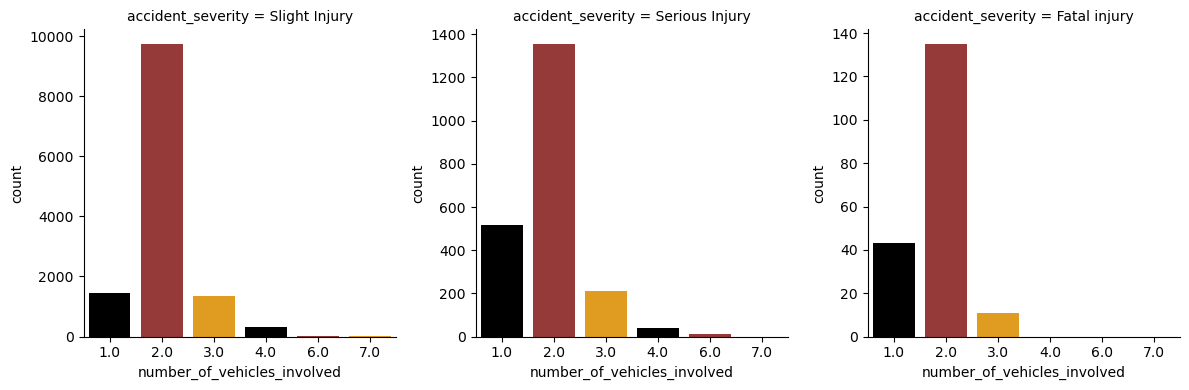

In [65]:
grid = sns.FacetGrid(data=new_df, col='accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

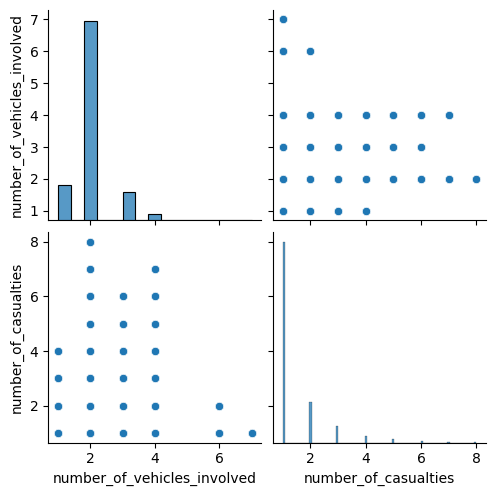

In [67]:
sns.pairplot(new_df)

#### Feature Engineering and Model Develpoment

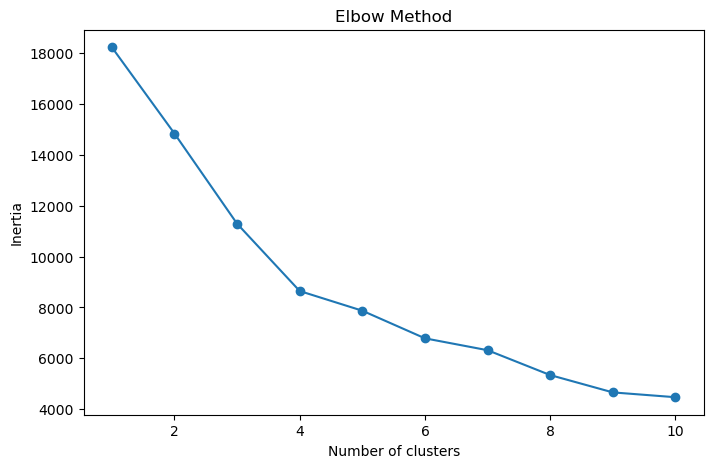

In [75]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


X = new_df[['area_accident_occured','number_of_casualties']]

encoder = OneHotEncoder()
X_scaled = encoder.fit_transform(X)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method to decide on the best 'K'
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



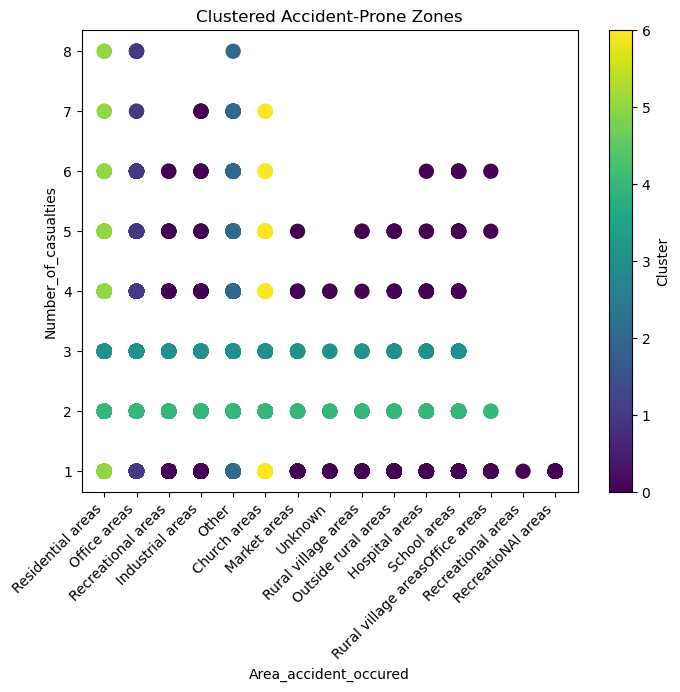

In [77]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)
new_df['cluster'] = y_kmeans
# Visualize the clusters on a map (scatter plot for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(new_df['area_accident_occured'], new_df['number_of_casualties'], c=new_df['cluster'], cmap='viridis', s=100)
plt.title('Clustered Accident-Prone Zones')
plt.xlabel('Area_accident_occured')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number_of_casualties')
plt.colorbar(label='Cluster')
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9908\2111529770.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Class 0:', target_count[0])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9908\2111529770.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Class 1:', target_count[1])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9908\2111529770.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(

Class 0: 12881
Class 1: 2135
Proportion: 6.03 : 1


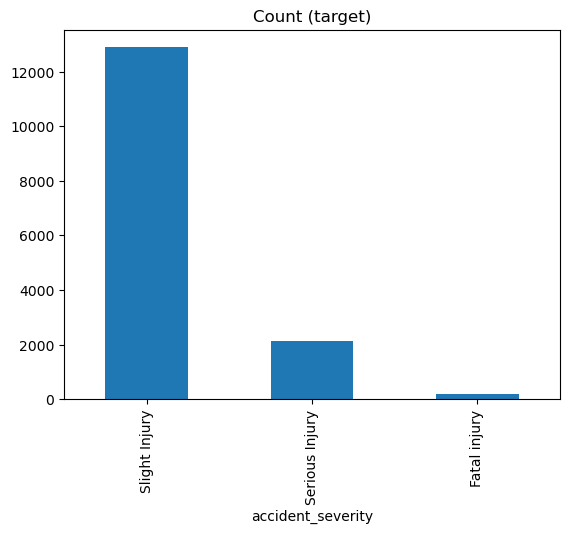

In [78]:
target_count = new_df['accident_severity'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [81]:
new_df['area_accident_occured'].isnull().sum()

0

In [83]:
#Dropping unnecessary columns

lists=['vehicle_driver_relation', 'work_of_casuality', 'fitness_of_casuality','day_of_week','casualty_severity','time','sex_of_driver','educational_level','defect_of_vehicle','owner_of_vehicle','service_year_of_vehicle', 'road_surface_type','sex_of_casualty','cluster']
new_df.drop(columns = lists, inplace=True)

In [85]:
new_df.shape

(15205, 19)

In [87]:
new_df.columns

Index(['age_band_of_driver', 'driving_experience', 'type_of_vehicle',
       'area_accident_occured', 'lanes_or_medians', 'road_allignment',
       'types_of_junction', 'road_surface_conditions', 'light_conditions',
       'weather_conditions', 'type_of_collision',
       'number_of_vehicles_involved', 'number_of_casualties',
       'vehicle_movement', 'casualty_class', 'age_band_of_casualty',
       'pedestrian_movement', 'cause_of_accident', 'accident_severity'],
      dtype='object')

In [89]:
new_df.dtypes

age_band_of_driver              object
driving_experience              object
type_of_vehicle                 object
area_accident_occured           object
lanes_or_medians                object
road_allignment                 object
types_of_junction               object
road_surface_conditions         object
light_conditions                object
weather_conditions              object
type_of_collision               object
number_of_vehicles_involved    float64
number_of_casualties           float64
vehicle_movement                object
casualty_class                  object
age_band_of_casualty            object
pedestrian_movement             object
cause_of_accident               object
accident_severity               object
dtype: object

In [91]:
new_df = new_df.astype({'number_of_vehicles_involved':'object','number_of_casualties':'object'})

In [93]:
new_df.dtypes

age_band_of_driver             object
driving_experience             object
type_of_vehicle                object
area_accident_occured          object
lanes_or_medians               object
road_allignment                object
types_of_junction              object
road_surface_conditions        object
light_conditions               object
weather_conditions             object
type_of_collision              object
number_of_vehicles_involved    object
number_of_casualties           object
vehicle_movement               object
casualty_class                 object
age_band_of_casualty           object
pedestrian_movement            object
cause_of_accident              object
accident_severity              object
dtype: object

In [95]:
'''for col in new_df.select_dtypes(include='object'):
    if new_df[col].nunique() <= 22:
        sns.countplot(y=col, data=new_df)
        plt.show()'''

"for col in new_df.select_dtypes(include='object'):\n    if new_df[col].nunique() <= 22:\n        sns.countplot(y=col, data=new_df)\n        plt.show()"

In [97]:
new_df.columns

Index(['age_band_of_driver', 'driving_experience', 'type_of_vehicle',
       'area_accident_occured', 'lanes_or_medians', 'road_allignment',
       'types_of_junction', 'road_surface_conditions', 'light_conditions',
       'weather_conditions', 'type_of_collision',
       'number_of_vehicles_involved', 'number_of_casualties',
       'vehicle_movement', 'casualty_class', 'age_band_of_casualty',
       'pedestrian_movement', 'cause_of_accident', 'accident_severity'],
      dtype='object')

In [112]:
X = new_df.drop('accident_severity', axis=1)
y = new_df['accident_severity']

#### Train the model

In [114]:
models={
        "LogisticRegression":LogisticRegression(),
        "DecisionTreeClassifier":DecisionTreeClassifier(),
        "SVM":SVC(),
        "KNeighborsClassifier":KNeighborsClassifier(),
        "GNB":GaussianNB(),
       "RandomForestClassifier":RandomForestClassifier(),
        "AdaBoostClassifier":AdaBoostClassifier(),
        "GradientBoostingClassifier":GradientBoostingClassifier(),
        }

In [118]:
categorical_features = new_df.select_dtypes(include=['object']).columns
numeric_features = [col for col in X.columns if col not in categorical_features]

In [120]:
categorical_features

Index(['age_band_of_driver', 'driving_experience', 'type_of_vehicle',
       'area_accident_occured', 'lanes_or_medians', 'road_allignment',
       'types_of_junction', 'road_surface_conditions', 'light_conditions',
       'weather_conditions', 'type_of_collision',
       'number_of_vehicles_involved', 'number_of_casualties',
       'vehicle_movement', 'casualty_class', 'age_band_of_casualty',
       'pedestrian_movement', 'cause_of_accident', 'accident_severity'],
      dtype='object')

In [122]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X = pd.get_dummies(X)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
def model_accuracy(models, X, y, scaleFlag):
    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    acc_result = {}

    for name, model in models.items():
        if scaleFlag == 1:
            model_pipeline = Pipeline([('MinMaxScaler', MinMaxScaler()), ('model', model)])
        elif scaleFlag == 2:
            model_pipeline = Pipeline([('StandardScaler', StandardScaler()), ('model', model)])
        else:
            model_pipeline = Pipeline([('model', model)])
        
        model_fit = model_pipeline.fit(X_train, y_train)
        y_pred = model_fit.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        
        print(f"The accuracy for {name} is: {acc:.4f}")
        
        acc_result[name] = acc
    
    return acc_result
    

In [126]:
def bestModel(result):
    high=0
    for name,acc in result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name," with accuaracy =>",high)

In [143]:
def bestParams(model,param,X_train,y_train):
    cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=42)
    grid_cv=GridSearchCV(estimator=model,param_grid=param,cv=cv,scoring="f1_weighted")
    res=grid_cv.fit(X_train,y_train)
    print("Best Parameters are ",res.best_params_)
    print("Best Accuracy is ",res.best_score_)

In [130]:
bestParams

<function __main__.bestParams(model, param, X_train, y_train)>

In [132]:
acc=model_accuracy(models,X,y,1)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy for LogisticRegression is: 0.8316
The accuracy for DecisionTreeClassifier is: 0.7810
The accuracy for SVM is: 0.8316
The accuracy for KNeighborsClassifier is: 0.8234
The accuracy for GNB is: 0.0707
The accuracy for RandomForestClassifier is: 0.8507


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy for AdaBoostClassifier is: 0.8300
The accuracy for GradientBoostingClassifier is: 0.8359


In [134]:
bestModel(acc)

Best Model is  RandomForestClassifier  with accuaracy => 0.8507070042749095


In [142]:
model=RandomForestClassifier() # Finding the best model and parameters
params={"n_estimators" : [100,200],
        "criterion" : ["gini","entropy"]
        }
bestParams(model,params,X_train,y_train)

Best Parameters are  {'criterion': 'gini', 'n_estimators': 200}
Best Accuracy is  0.80897274976891


In [149]:
#retrain the model with best parameters
model=RandomForestClassifier(criterion="entropy",n_estimators=200)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

0.8490628082867477
              precision    recall  f1-score   support

           0       1.00      0.02      0.05        42
           1       0.93      0.12      0.21       470
           2       0.85      1.00      0.92      2529

    accuracy                           0.85      3041
   macro avg       0.93      0.38      0.39      3041
weighted avg       0.86      0.85      0.80      3041



<Axes: >

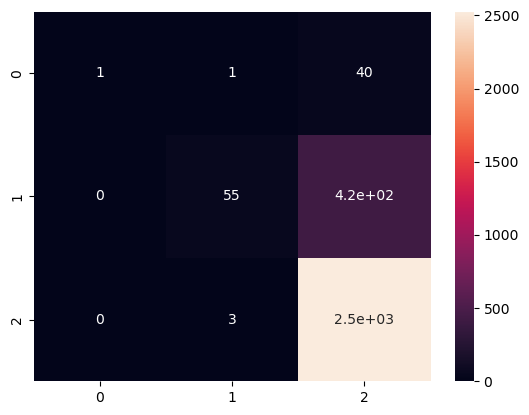

In [151]:
#Final Evaluation of model
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)